In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
# read data
data = pd.read_csv("alzheimers_disease_data.csv")
data.shape

(2149, 35)

In [8]:
data.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)
data.head(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [12]:
# Identify numerical features: features with more than 5 unique values are considered numerical
numerical_columns = [col for col in data.columns if data[col].nunique() > 5]

# Identify categorical features: features that are not numerical and not 'Diagnosis'
categorical_columns = data.columns.difference(numerical_columns).difference(["Diagnosis"]).to_list()

print("Numerical cols:", len(numerical_columns))
print("Categorical cols:", len(categorical_columns))

Numerical cols: 15
Categorical cols: 17


## Distribution of Categorical Features

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


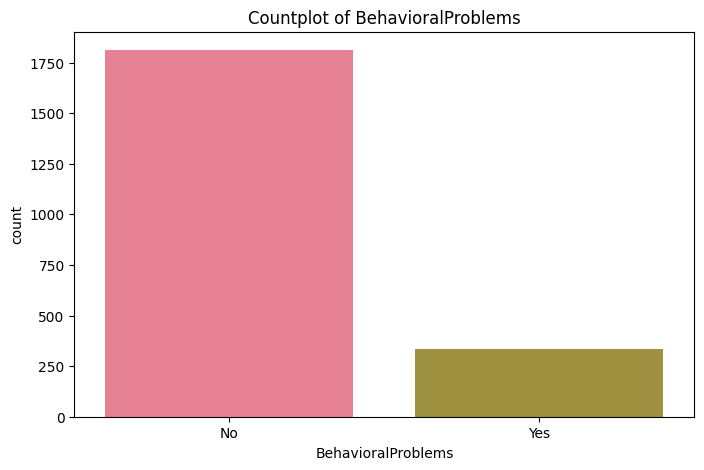

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


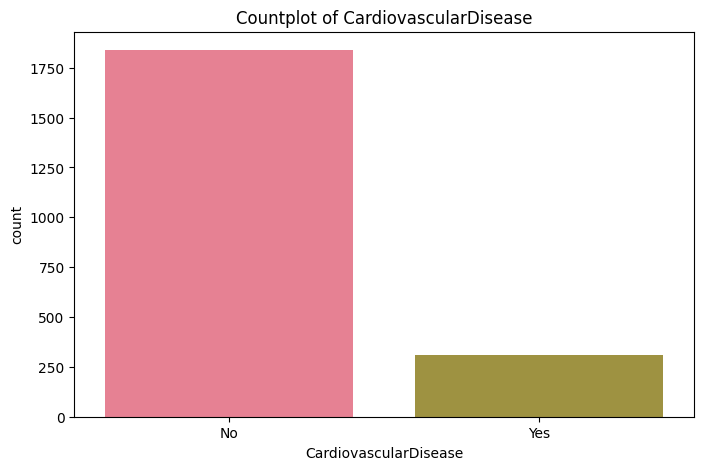

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


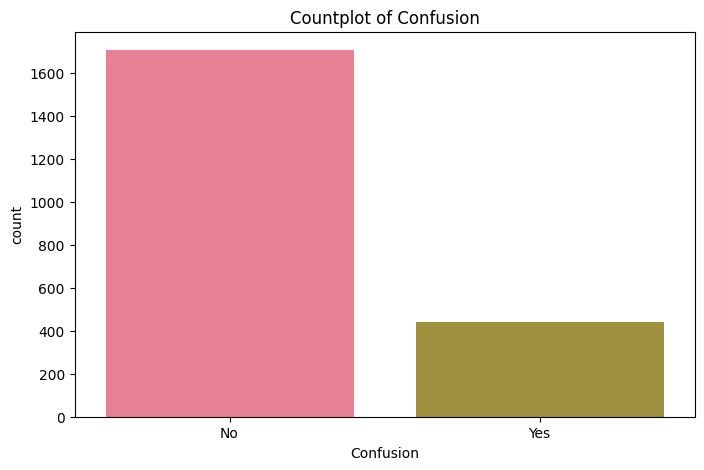

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


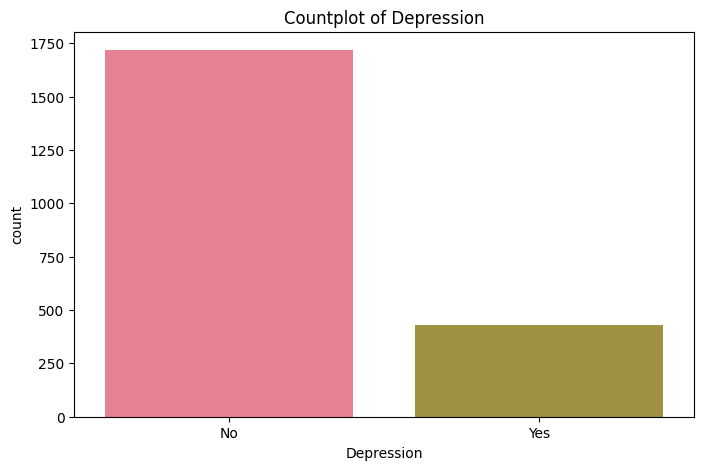

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


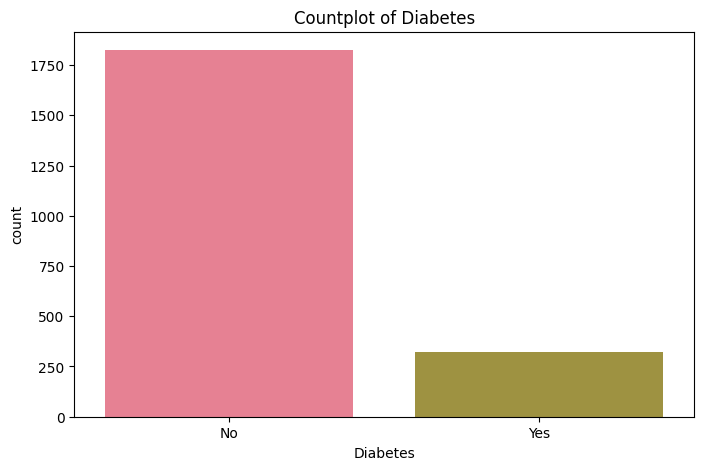

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


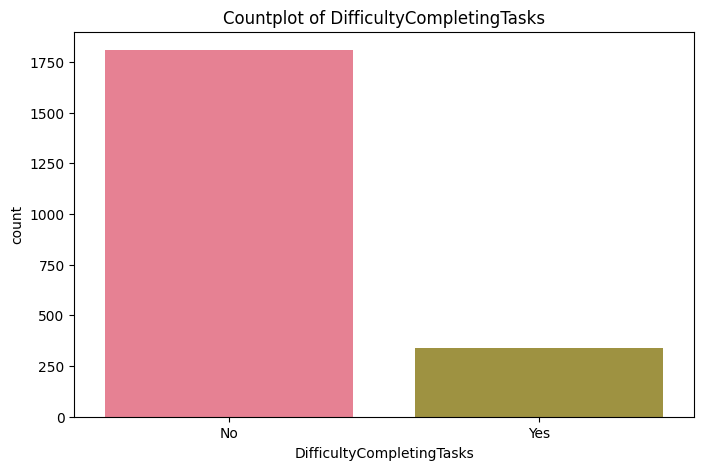

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


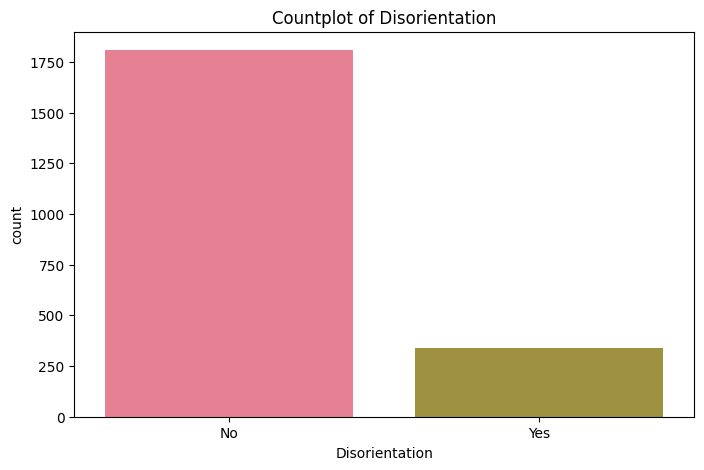

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


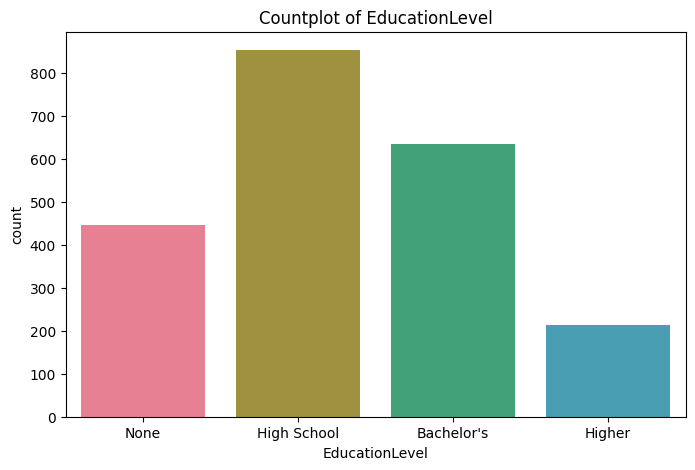

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


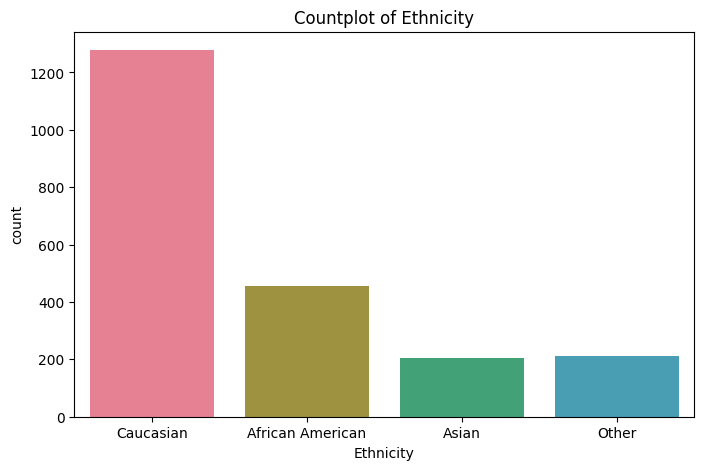

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


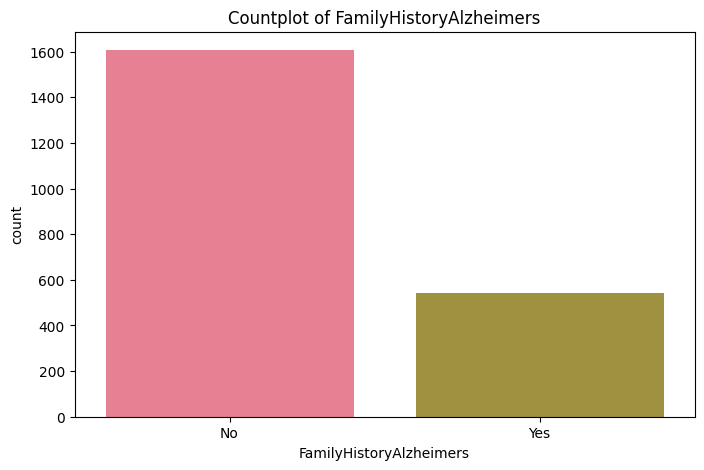

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


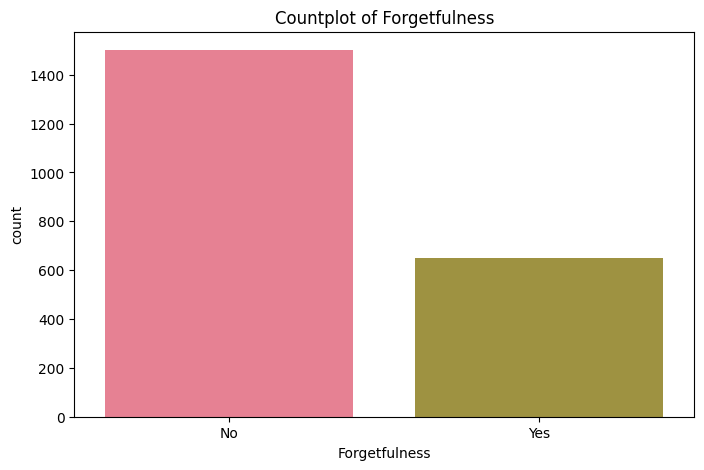

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


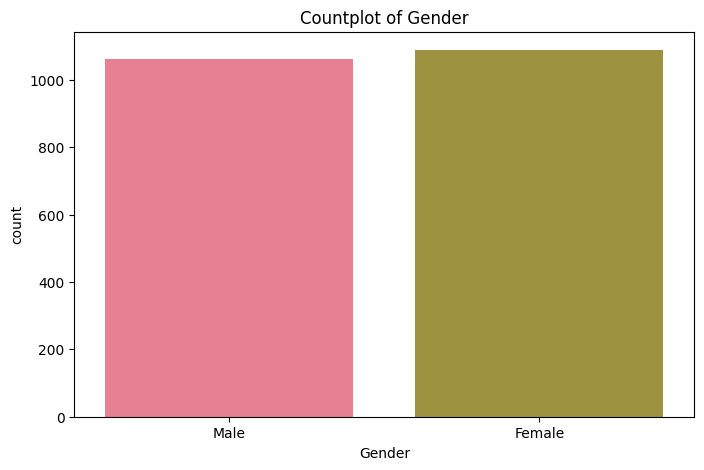

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


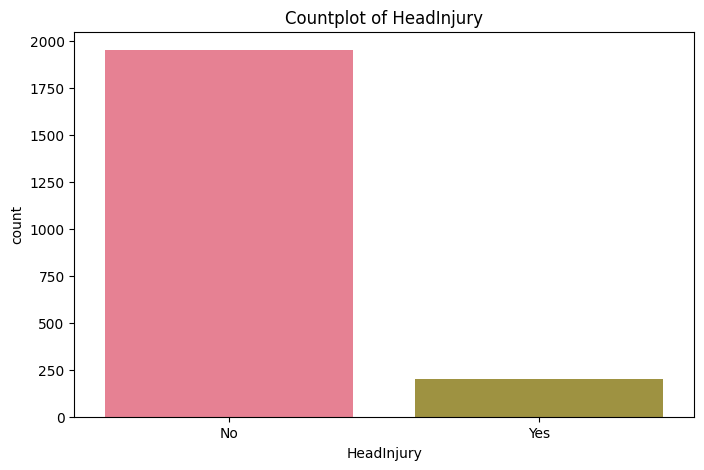

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


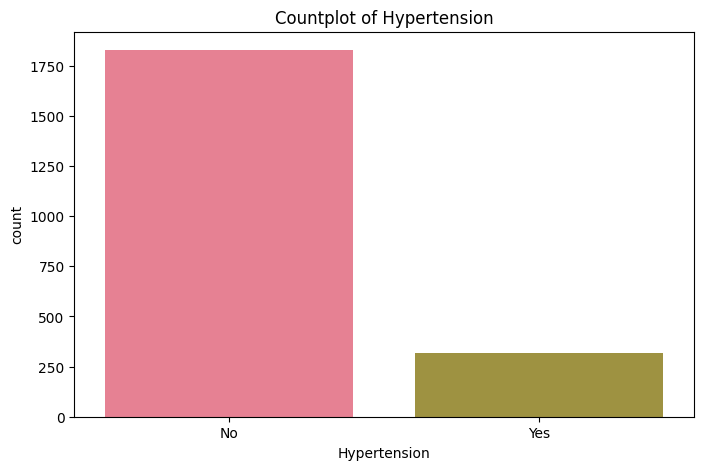

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


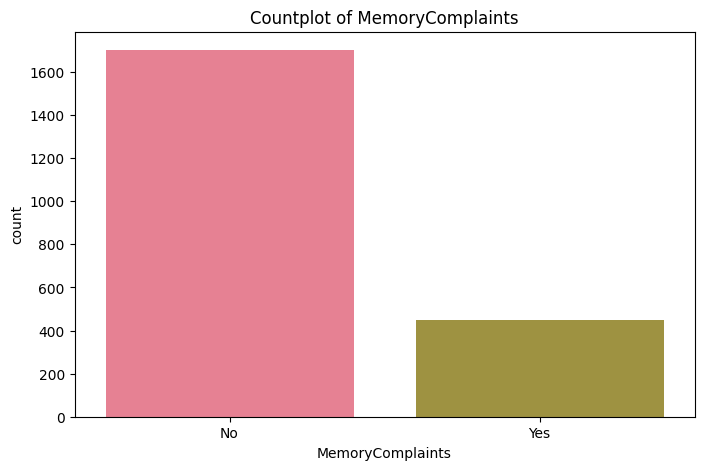

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


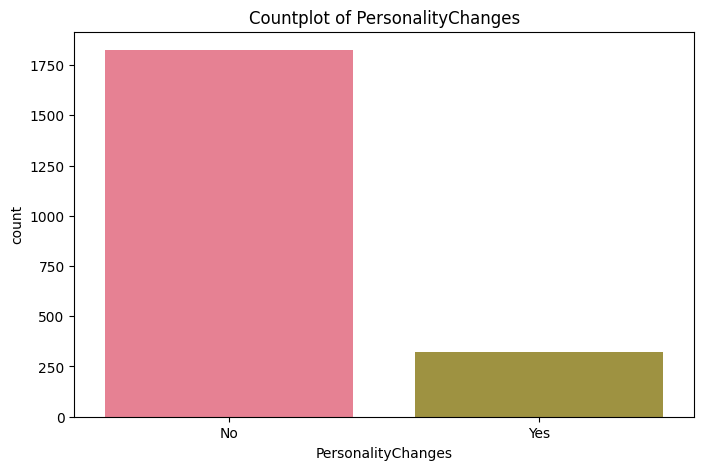

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=palette)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3909432668.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, palette=palette)


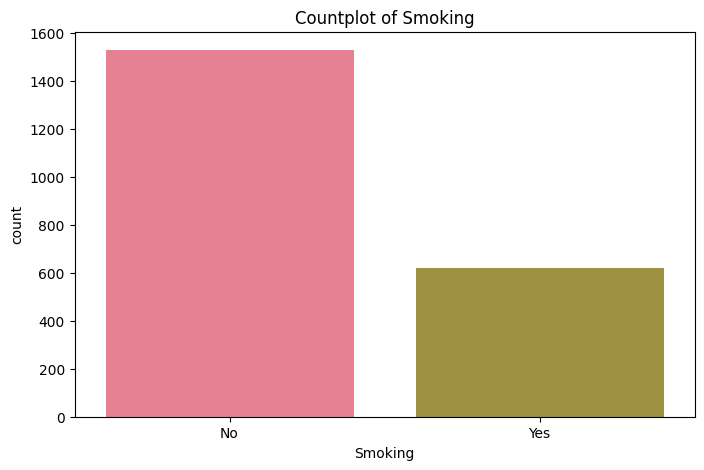

In [14]:
# Generate a smooth color palette with 5 colors
palette = sns.color_palette('husl', 5)

# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, palette=palette)
    plt.title(f'Countplot of {col}')
    
    # Directly set custom labels
    labels = custom_labels[col]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.show() # 17 total count plot charts

## Categorical Features Visualization Summary

- Caucasian is the most represented ethnicity.
- 
The dataset predominantly consists of individuals without disease or other health issues
- e.
Both Female & Male are closely equally represented in the data
- High School constitude the largest educational group, followed by Bachelor's degree.set.

## Numerical Feature Distribution

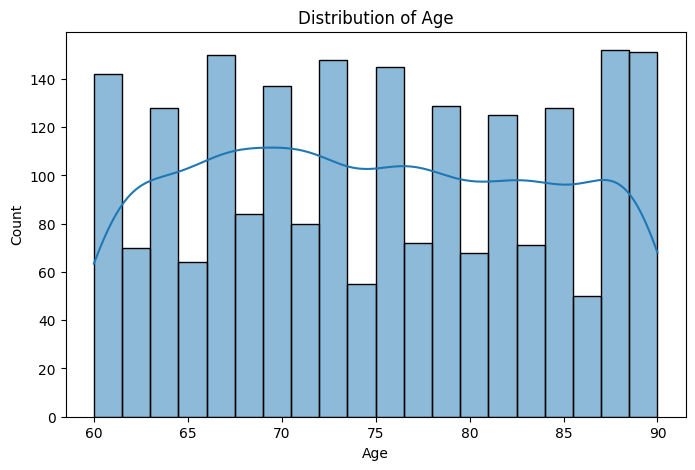

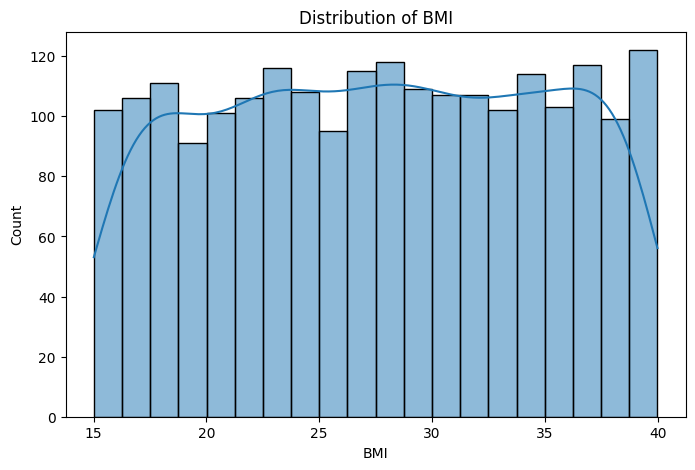

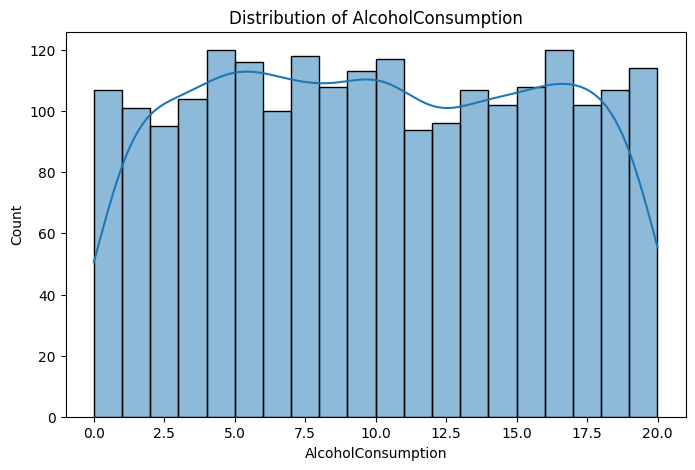

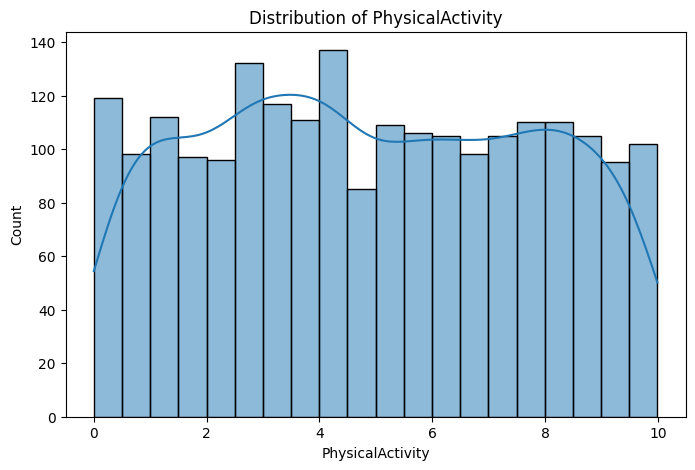

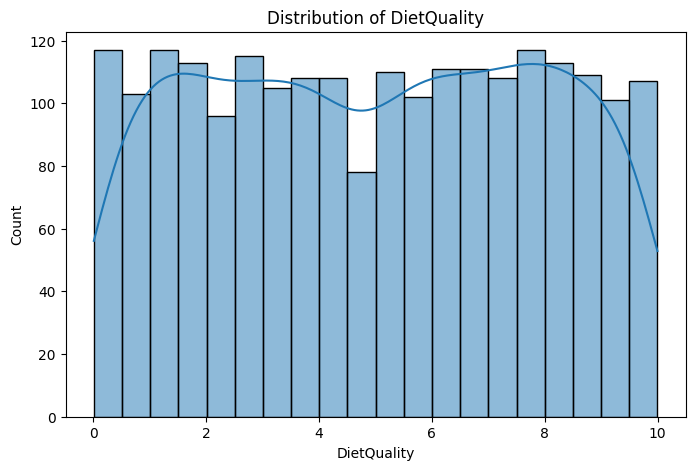

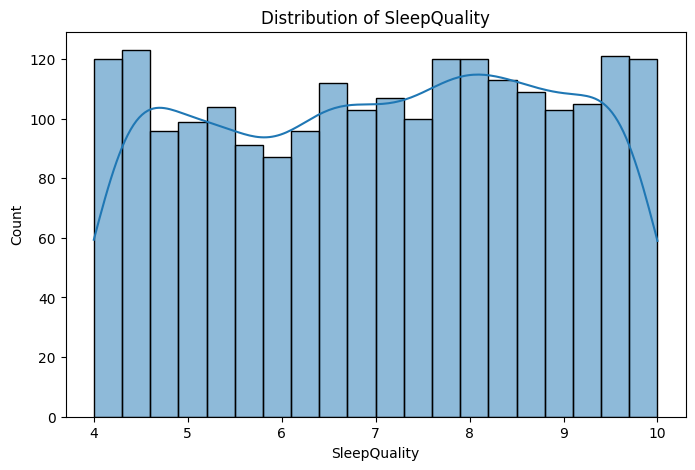

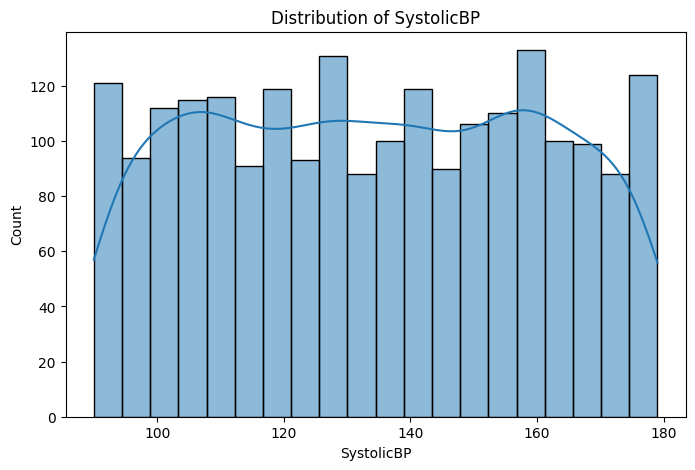

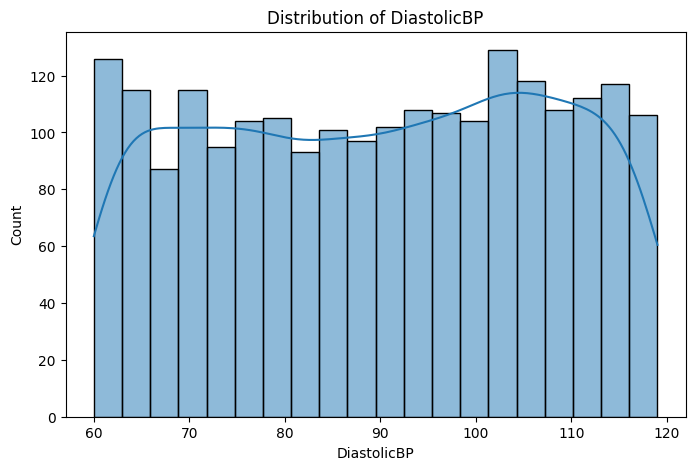

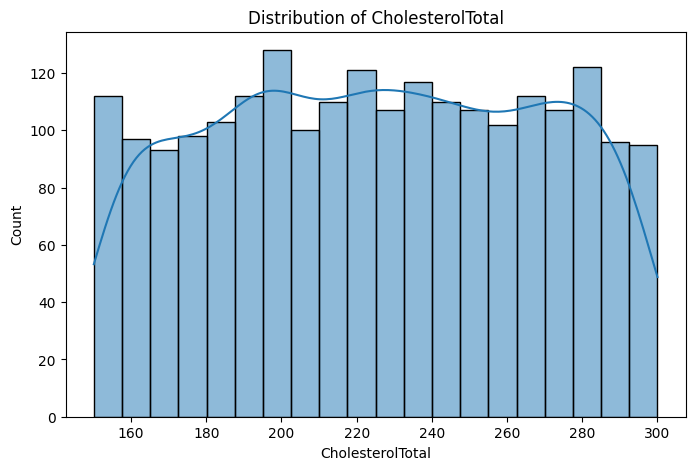

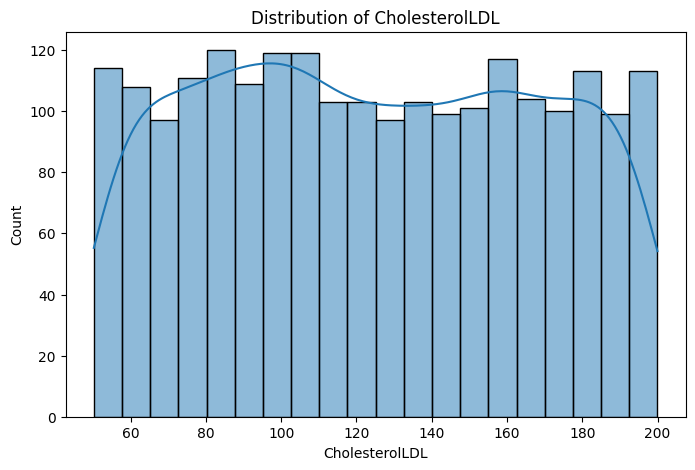

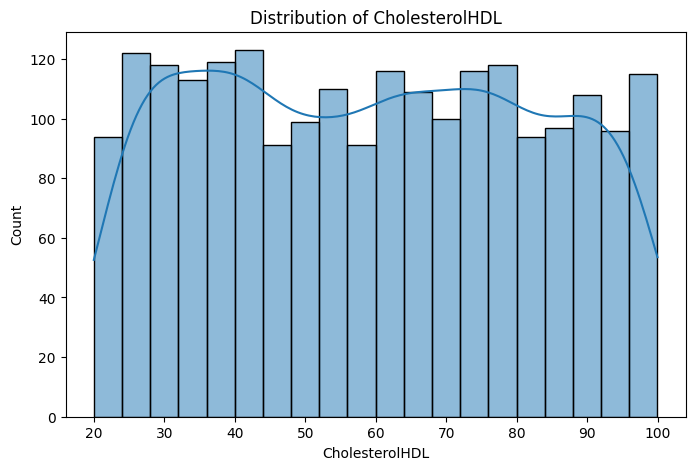

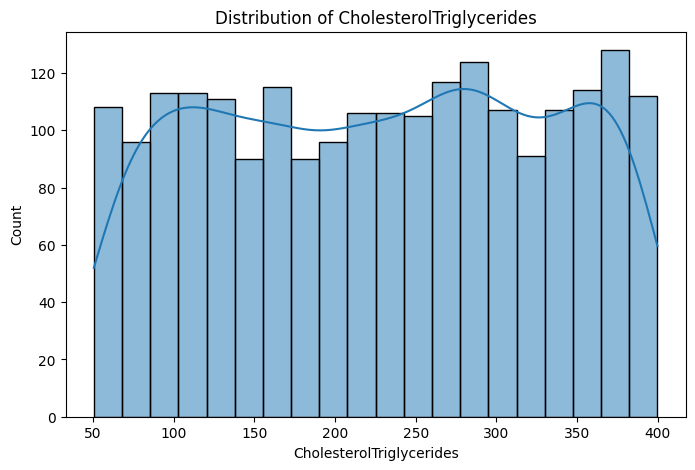

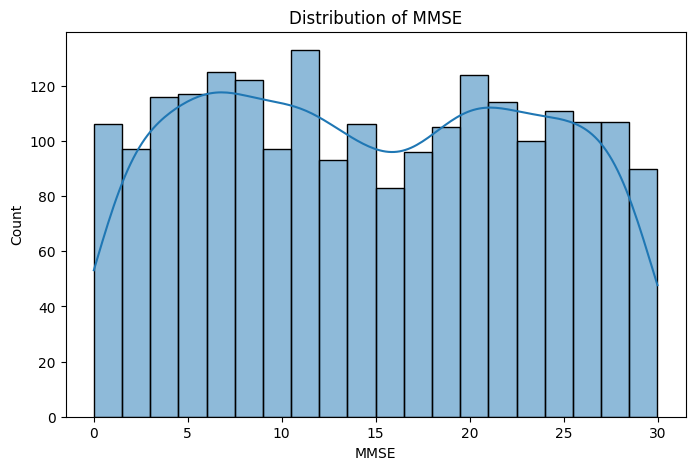

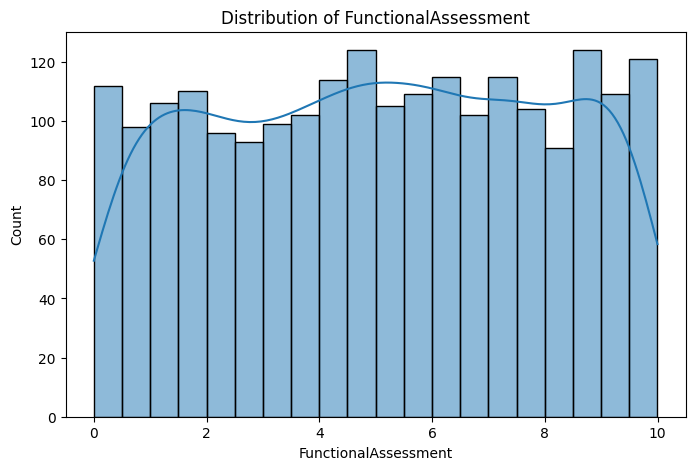

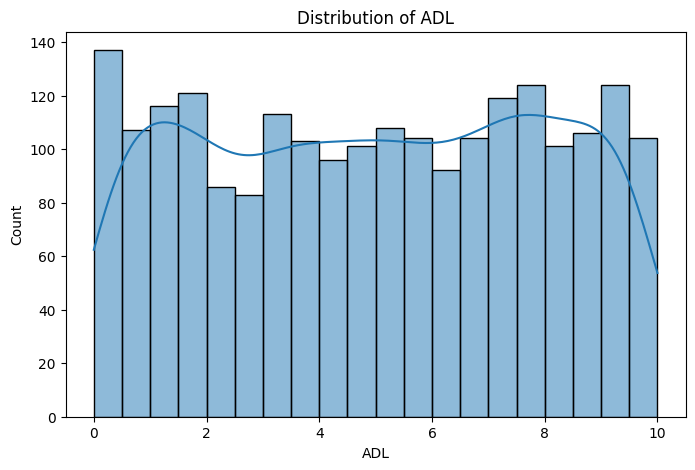

In [16]:
# Plot histogram for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

## Numerical Feature Distribution Summary

- Most features show a fairly uniform distribution
- The "MMSE" (Mini-Mental State Examination) distribution appears to be Bimodal, indicating two 2 distinct groups within the data.

## Distribution of the Target Variable

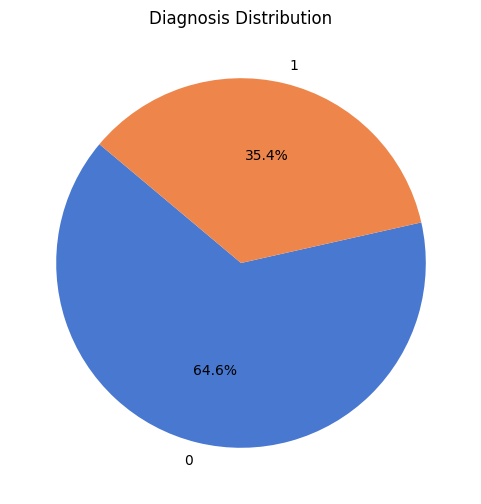

In [28]:
# Define the Response categories and count occurances
categories = [0, 1]
counts = data.Diagnosis.value_counts().tolist()

# Color palette
colors = sns.color_palette("muted")

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

## Target Value Distribution Summary


- 
The target value is moderately imbalanced with ~65% of instances being 0 and ~35% being 1
- This confirms our previous observation in the Categorical Feature Distribution Countplots that the data is skewed heavily y towards individuals without Alzheimer's Disease.

## Effects of 'Age', 'Gender', 'Ethnicity', and 'Educational Level'

C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3198167520.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  axs[0, 0].pie(data.groupby('bins').size(), labels=data.groupby('bins').size().index, colors=colors, autopct='%.0f%%',radius=0.8)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\3198167520.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  axs[0, 0].pie(data.groupby('bins').size(), labels=data.groupby('bins').size().index, colors=colors, autopct='%.0f%%',radius=0.8)


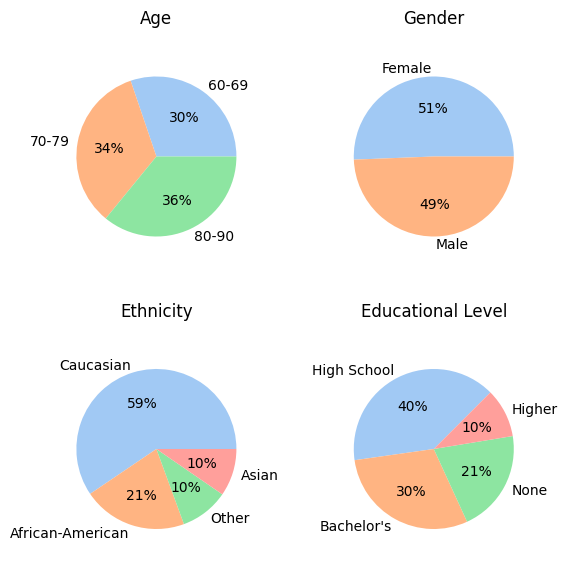

In [43]:
# Define colors palette
colors = sns.color_palette('pastel')[0:5]

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# Pie chart for Age
data['bins'] = pd.cut(data['Age'], bins=[60, 69, 79, 90], labels=["60-69", "70-79", "80-90"])
axs[0, 0].pie(data.groupby('bins').size(), labels=data.groupby('bins').size().index, colors=colors, autopct='%.0f%%',radius=0.8)
axs[0, 0].set_title("Age")

# Pie chart for Gender
axs[0, 1].pie(data['Gender'].value_counts(), labels=['Female', 'Male'], colors=colors, autopct='%.0f%%',radius=0.8)
axs[0, 1].set_title("Gender")

# Pie chart for Ethnicity
axs[1, 0].pie(data['Ethnicity'].value_counts(), labels=['Caucasian', 'African-American', 'Other', 'Asian'], colors=colors, autopct='%.0f%%',radius=0.8)
axs[1, 0].set_title("Ethnicity")

# Pie chart for Educational Level
axs[1, 1].pie(data['EducationLevel'].value_counts(), startangle=45, labels=['High School', "Bachelor's", 'None', 'Higher'], colors=colors, autopct='%.0f%%',radius=0.8)
axs[1, 1].set_title("Educational Level")

# Remove the 'bins' column from the data
data.drop(['bins'], axis=1, inplace=True)

# Adjust layout and display
plt.tight_layout()
plt.show()

## So far, we can confirm some of the previously stated points:
- Gender distribution is balanced.
- 
The age pie chart suggest the highest proportion of patients falls within the 80-90 age group
- .
In terms of ethnicity, Caucasian patients are the most prevale
- t.
The most common educational levels are high school followed by bachelor's degrees.

## Distribution of AD Diagnosed patients based on 'EducationLevel', 'Ethnicity' and 'FamilyHistoryAlzheimers'

In [50]:
def create_diagnosis_dataframe(column_name, index_mapping):
    total = data[column_name].value_counts().sort_index()
    total.name='Total'
    diagnosis1 = data.groupby(column_name)['Diagnosis'].sum()
    percentage = diagnosis1 / total * 100
    percentage.name = 'Diagnosis, %'
    
    df = pd.concat([total, diagnosis1, percentage], axis=1)
    df['Total, %'] = 100  
    df.index = index_mapping
    return df
    

print("Education Level DataFrame:")
df_educ=create_diagnosis_dataframe('EducationLevel', ['None', 'Highschool', "Bachelor's", 'Higher'])
print(df_educ,'\n')

print("Ethnicity DataFrame:")
df_ethn=create_diagnosis_dataframe('Ethnicity', ['Caucasian', 'African-American', 'Asian', 'Other'])
print(df_ethn,'\n')

print("Family History of Alzheimer's DataFrame:")
df_famh=create_diagnosis_dataframe('FamilyHistoryAlzheimers', ['Yes', 'No'])
print(df_famh,'\n')

Education Level DataFrame:
            Total  Diagnosis  Diagnosis, %  Total, %
None          446        174     39.013453       100
Highschool    854        302     35.362998       100
Bachelor's    636        217     34.119497       100
Higher        213         67     31.455399       100 

Ethnicity DataFrame:
                  Total  Diagnosis  Diagnosis, %  Total, %
Caucasian          1278        463     36.228482       100
African-American    454        146     32.158590       100
Asian               206         84     40.776699       100
Other               211         67     31.753555       100 

Family History of Alzheimer's DataFrame:
     Total  Diagnosis  Diagnosis, %  Total, %
Yes   1607        583     36.278780       100
No     542        177     32.656827       100 



C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\1162452499.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.index, y='Total, %', data=df, color='gray', label='Diagnosis=0', ax=ax, ci=None)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\1162452499.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.index, y='Diagnosis, %', data=df, color='red', label='Diagnosis=1', ax=ax, ci=None)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\1162452499.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.index, y='Total, %', data=df, color='gray', label='Diagnosis=0', ax=ax, ci=None)
C:\Users\chapp\AppData\Local\Temp\ipykernel_21628\1162452499.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.index, y='Diagnosis, %', data=df, colo

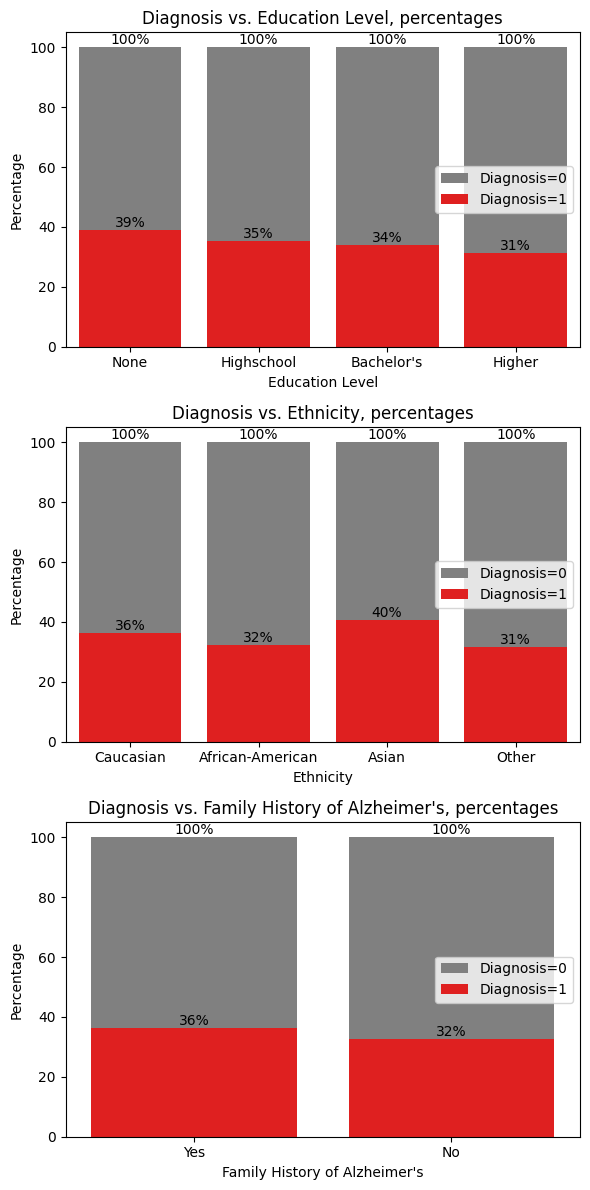

In [52]:
def plot_diagnosis_vs_category(ax, df, category_name):
    sns.barplot(x=df.index, y='Total, %', data=df, color='gray', label='Diagnosis=0', ax=ax, ci=None)
    sns.barplot(x=df.index, y='Diagnosis, %', data=df, color='red', label='Diagnosis=1', ax=ax, ci=None)
    ax.set_title(f"Diagnosis vs. {category_name}, percentages")
    ax.set_xlabel(category_name)
    ax.set_ylabel('Percentage')
    ax.legend()
    for container in ax.containers:
        labels = [f'{int(v.get_height())}%' for v in container]
        ax.bar_label(container, labels=labels, label_type='edge')

fig, axs = plt.subplots(3, 1, figsize=(6, 12))  # Adjust figure size to fit the bars better

plot_diagnosis_vs_category(axs[0], df_educ, "Education Level")
plot_diagnosis_vs_category(axs[1], df_ethn, "Ethnicity")
plot_diagnosis_vs_category(axs[2], df_famh, "Family History of Alzheimer's")
plt.tight_layout()
plt.show()

## Summary of AD Diagnosed Patients

## Diagnosis vs. Education Level
- A **gentle decline** along the x-axis suggests that **higher education levels** may be associated with a **reduced risk of Alzheimer's Disease (AD)**.

## Diagnosis vs. Ethnicity
- The data indicates a **marginally increased risk** of Alzheimer's Disease (AD) for individuals of **Asian descent**.

## Diagnosis vs. Family History of Alzheimer's
- The analysis **shows no significant effect**, suggesting that **family history does not strongly influence** the risk of Alzheimer's Disease (AD) in this dataset.
- 😯 **Surprisingly and contrary to expectations** 😯, there is a **~4% difference** in AD-diagnosed patients **with and without a family history** of Alzheimer's.


## Correlations

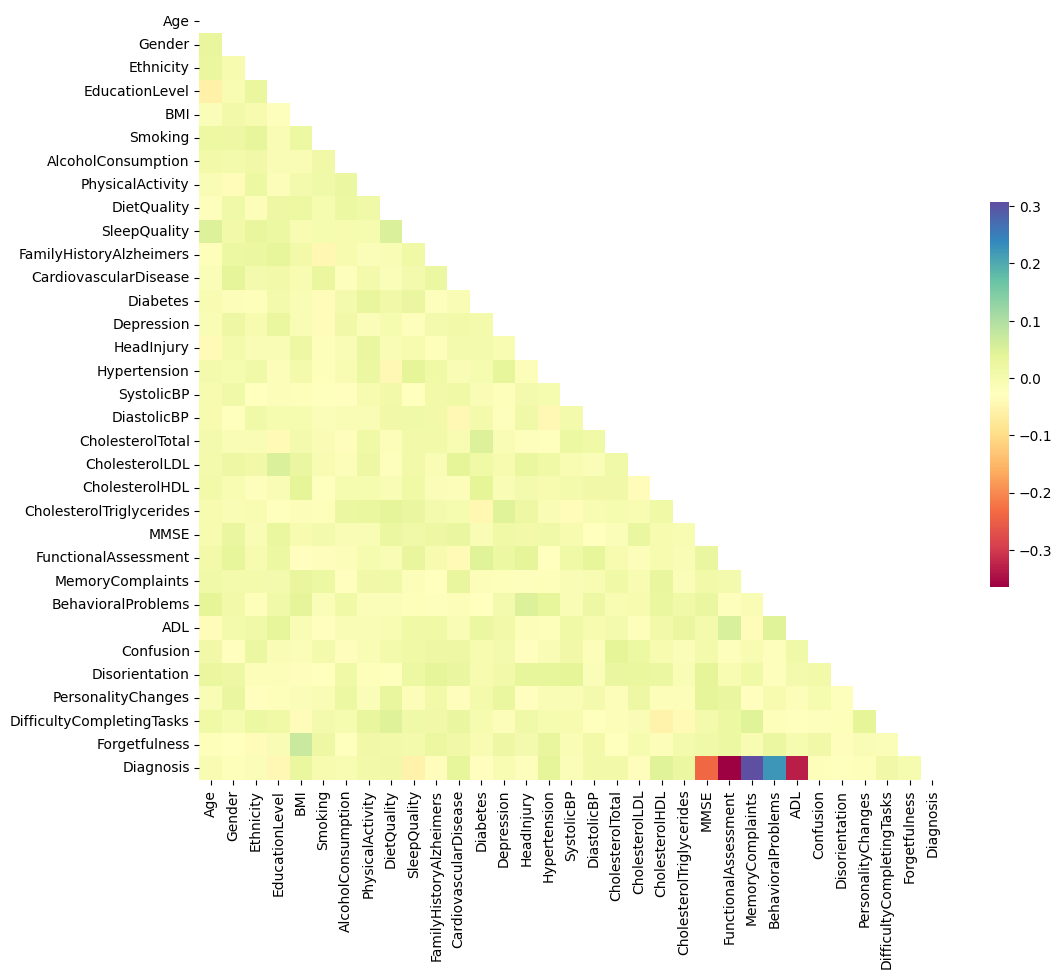

In [56]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(),cmap="Spectral", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

## Correlations Explained

- The heatmap suggests that **features do not have any strong correlations** among themselves.
- However, **five columns** show some correlation with the **target variable**. These features are:
  - **MMSE** (Mini-Mental State Examination)
  - **Functional Assessment**
  - **Memory Complaints**
  - **Behavioral Problems**
  - **ADL** (Activities of Daily Living)


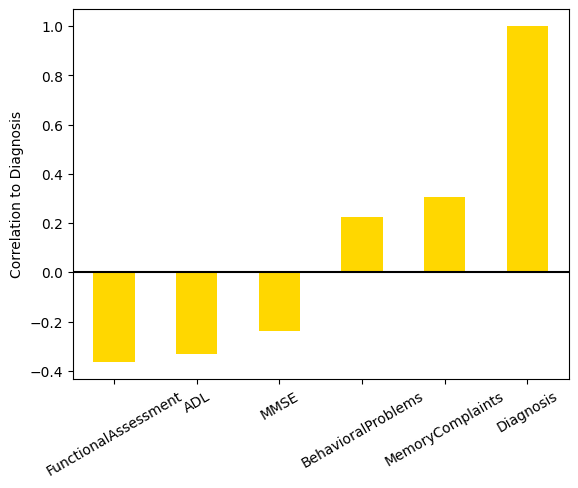

In [59]:
corr_matrix=data.corr()['Diagnosis']
heatcol=data.columns[corr_matrix.abs() > 0.1]
data[heatcol].corr()['Diagnosis'].sort_values().plot(kind='bar',color='gold')
plt.axhline(0, color="k")
plt.ylabel('Correlation to Diagnosis')
plt.xticks( rotation=30)
plt.show()

## Correlations Explained (2)

- As observed, there are **five columns** correlated with the **target variable**.

### **Numerical Features (Negative Correlation)**
- **Functional Assessment**
- **ADL (Activities of Daily Living)**
- **MMSE (Mini-Mental State Examination)**  

📉 These features are **negatively correlated** with the **diagnosis of Alzheimer's Disease (AD)**.  
This indicates that **lower scores** in these assessments are associated with a **higher likelihood of AD**.

### **Categorical Variables (Positive Correlation)**
- **Behavioral Problems**
- **Memory Complaints**  

📈 These features are **positively correlated** with the **diagnosis of Alzheimer's Disease (AD)**.  
This means that the **presence** of these issues is associated with a **higher likelihood of an AD diagnosis**, highlighting their **significance** in the **diagnostic process**.
